In [1]:
# install
!pip install turicreate
!pip install pandas
!pip install spaCy
!pip install datetime
!pip install imageio
!pip install yfinance
!pip install us
!pip install geoplot
!pip install plotly-geo
!pip install geopandas
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install chart-studio
!pip install -U kaleido
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

     |████████████████████████████████| 92.0 MB 6.9 kB/s 
     |████████████████████████████████| 322 kB 48.7 MB/s 
     |████████████████████████████████| 86.4 MB 38 kB/s 
     |████████████████████████████████| 3.6 MB 35.9 MB/s 
     |████████████████████████████████| 3.5 MB 40.8 MB/s 
     |████████████████████████████████| 18.3 MB 76 kB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 449 kB 52.4 MB/s 
     |████████████████████████████████| 3.8 MB 38.5 MB/s 
     |████████████████████████████████| 2.9 MB 38.3 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=f5042b8bc0e3c398d86a45d756da87603ad59c96f12ba22e8968cd782f37fff4
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=6ec5904a045

     |████████████████████████████████| 60 kB 2.8 MB/s 
     |████████████████████████████████| 251 kB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 5.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=eac46694ea1d41027d21118a4193f799b507d0775bc2aa97ab641b782f623c77
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 132 kB 4.2 MB/s 
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11942 sha256=95d33794bfcd62e47de76edebb5f53db44dcb5f2ed2eed9fa8a4f3ec9a2517db
  Stored in directory: /root/.cache/pip/wheels/ca/6b/11/cda9ea2438f721330a35c9a2c8e34b4aedcd34c89af48a4d00
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl si

In [2]:
!git clone https://github.com/amitsultan/data_mining_project.git

Cloning into 'data_mining_project'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 52 (delta 7), reused 48 (delta 3), pack-reused 0
Unpacking objects: 100% (52/52), done.


# Data Mining - Project

In this project we will analyze the presidential elections results from the years 2000-2020.
<br>
Our focus will be on the state of California and it's counties, we will look further into the details we have on each county and explore the results.
<br>
<br>


In [3]:
base_folder = './data_mining_project/'

In [4]:
import pandas as pd


df = pd.read_csv(base_folder + 'countypres_2000-2020.csv')
df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245.0,4032.0,20210622,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360.0,3560.0,20210622,TOTAL
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46.0,3560.0,20210622,TOTAL
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47.0,3560.0,20210622,TOTAL


# State of California

After seperating California (CA) data from the rest of the US presidential election data we can look at the details presented in the dataset.
<br>
Our focus will be on the party from each election, we will look on the dominant party from each county at CA.
<br>
## visualizing the data

We want to see how CA changes with time, meaning we want to see what counties voted for what party along our time axis.
<br>
To achive that we use plotlyy "figure_factory" which enable us to plot US related data with ease.
<br><Br>
## Results
In the gif below we present the change on each county over the last 20 years, we can see how most of <br>
CA were republicans but thats changed the further we go to 2020.<br>
**We want to see if there is a connection between that change to other subjects in CA and we will show dive<br>into it in next section.**

In [5]:
state_name = 'CALIFORNIA'
specific_state = df[df['state'] == state_name]
specific_state = specific_state.drop(['office', 'candidate', 'version', 'mode'], axis=1)
specific_state['county_fips'] = specific_state['county_fips'].astype(int)
specific_state = specific_state.dropna()
specific_state

,year,state,state_po,county_name,county_fips,party,candidatevotes,totalvotes
628,2000,CALIFORNIA,CA,ALAMEDA,6001,DEMOCRAT,342889.0,494336.0
629,2000,CALIFORNIA,CA,ALAMEDA,6001,REPUBLICAN,119279.0,494336.0
630,2000,CALIFORNIA,CA,ALAMEDA,6001,GREEN,27499.0,494336.0
631,2000,CALIFORNIA,CA,ALAMEDA,6001,OTHER,4669.0,494336.0
632,2000,CALIFORNIA,CA,ALPINE,6003,DEMOCRAT,265.0,586.0
...,...,...,...,...,...,...,...,...
52940,2020,CALIFORNIA,CA,YUBA,6115,DEMOCRAT,11230.0,29796.0
52941,2020,CALIFORNIA,CA,YUBA,6115,GREEN,124.0,29796.0
52942,2020,CALIFORNIA,CA,YUBA,6115,LIBERTARIAN,510.0,29796.0
52943,2020,CALIFORNIA,CA,YUBA,6115,OTHER,256.0,29796.0


In [6]:
def get_county_to_fips_dict(df):
  fips_dict = {}
  for index, row in df.iterrows():
    if row['county_name'].lower() not in fips_dict:
      fips_dict[row['county_name'].lower()] = row['county_fips']
  return fips_dict

In [7]:
specific_state_group = specific_state.groupby(by=['year', 'county_name'])
specific_state_group

In [8]:
yearly_data = {}

for name, group in specific_state_group:
    group['percentage'] = group.apply(lambda x: (x['candidatevotes'] / x['totalvotes']) * 100, axis=1)
    dom_party_df = group.loc[group['percentage'].idxmax()]
    year = dom_party_df['year']
    party = dom_party_df['party']
    vote_percentage = dom_party_df['percentage']
    county_fip = dom_party_df['county_fips']
    if year in yearly_data:
        yearly_data[year].append((county_fip, party, vote_percentage))
    else:
        yearly_data[year] = [(county_fip, party, vote_percentage)]

In [9]:
def get_specific_year_data(all_years, year):
    values = []
    fips = []
    votes = []
    for fip, party, vote_percentage in all_years[year]:
        fips.append(fip)
        values.append(party)
        votes.append(vote_percentage)
    return values, fips, votes

In [10]:
import plotly.figure_factory as ff

def create_fig_for_year(yearly_data, year, state_name):
    values, fips, votes = get_specific_year_data(yearly_data, year)


    fig = ff.create_choropleth(
        fips=fips, values=values, scope=[state_name],round_legend_values=True,
        show_hover=True,
        title=f'{state_name} party per county at year: {year}',
        legend_title='Parties',
        plot_bgcolor='rgb(229,229,229)',
        paper_bgcolor='rgb(229,229,229)',
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        exponent_format=True,
    )
    return fig

In [11]:
from tqdm import tqdm
import imageio # need install imageio 
import plotly.figure_factory as ff
!mkdir ./images
path = 'images'

def create_wave_images(yearly_data, path, state_name):
    images_list = []
    for year in tqdm(yearly_data.keys()):
        fig = create_fig_for_year(yearly_data, year, state_name)
        img_path = f"{path}/state_name_{year}.png"
        fig.write_image(img_path)
        images_list.append(img_path)
    images = []
    for filename in images_list:
        images.append(imageio.imread(filename))
    imageio.mimsave(f"{path}/animation.gif", images, duration=1)

In [12]:
create_wave_images(yearly_data, path, state_name)

100%|██████████| 6/6 [00:24<00:00,  4.06s/it]


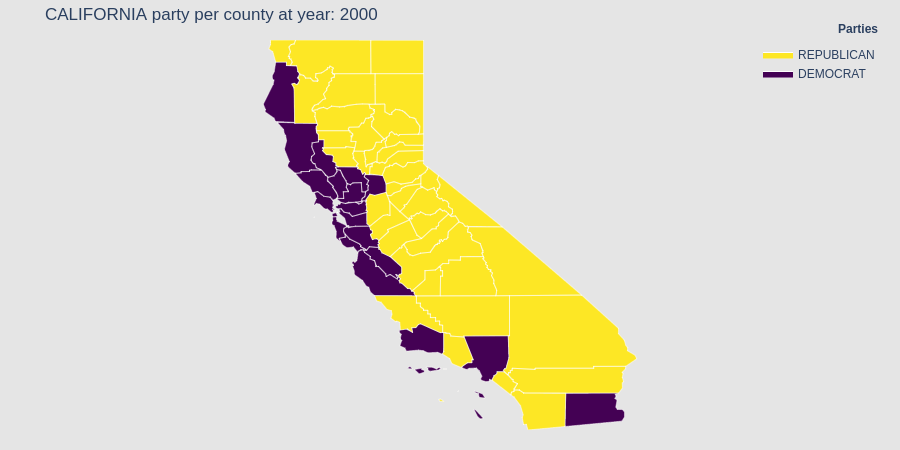

In [13]:
from IPython.display import Image 
Image('./images/animation.gif', format='png')

# FRPM - Free or Reduced-Price Meal
Some students in the US are eligible for FRPM which is free or reduced price meals, <br> families are considered eligibale if they have a certain income.
<br>
<br>
### Does counties presidential party choice effect the FRPM?
A question arises whether there is a connection between the party of a given county to the mean FRPM, does<br> republican counties have a lower income requirements or maybe less people need the FRPM?.

# Data Preprocessing
The data we found doesn't go back to 2000 and only begin to been record at 2011 so we will compare that window instead.<Br>
The data itself was very unorganized and we speculate that was because institutions often changes their data format according to their own needs or having trouble keeping a consistent data format.<br>
<br>
We had to manually change a few columns name just to make the process itself easier, the rest was done in the notebook.<br>
Our goal is to see wheter or not there is a connection between FRPM to county party and thus we will aggregate all the data to a dictionary containing yearly data for each county.<br>
We only consider the Mean FRPM as our measure for each county.<br>


In [14]:
from glob import glob


free_meals_filepaths = glob(base_folder + 'free-meals/*')
free_meals_filepaths

['./data_mining_project/free-meals/frpm2014.xls',
 './data_mining_project/free-meals/frpm2012.xls',
 './data_mining_project/free-meals/frpm2015.xls',
 './data_mining_project/free-meals/frpm2011.xls',
 './data_mining_project/free-meals/frpm2016.xls',
 './data_mining_project/free-meals/frpm2013.xls',
 './data_mining_project/free-meals/frpm2020.xlsx',
 './data_mining_project/free-meals/frpm2018.xlsx',
 './data_mining_project/free-meals/frpm2019.xlsx',
 './data_mining_project/free-meals/frpm2017.xlsx']

In [15]:
import re
import numpy as np

dfs = []

for xls_path in free_meals_filepaths:
  year = re.sub('[^0-9,]', "", xls_path)
  xls = pd.ExcelFile(xls_path)
  df = pd.read_excel(xls, 'FRPM')
  frpm_values = []
  county_name = []
  years = np.full(len(df), year, dtype=int)
  for column in df.columns:
    if 'Percent FRPM' in str(column):
      frpm_values = df[column].values * 100
    if 'County Name' in str(column) or 'County \nName' in str(column):
      county_name = df[column].values
  np.full((3, 5), 7, dtype=int)
  if len(frpm_values) == 0 or len(county_name) == 0:
    exit(-1)
  else:
    tmp_df = pd.DataFrame({'year': years, 'county': county_name,'Percent FRPM': frpm_values})
    dfs.append(tmp_df)

In [16]:
all_dfs = pd.concat(dfs)
all_dfs

,year,county,Percent FRPM
0,2014,Alameda,65.607477
1,2014,Alameda,48.404255
2,2014,Alameda,73.043478
3,2014,Alameda,73.157895
4,2014,Alameda,8.171206
...,...,...,...
10470,2017,Yuba,48.979592
10471,2017,Yuba,0.000000
10472,2017,Yuba,45.725389
10473,2017,Sierra,0.000000


In [17]:
grouped_county_per_year = all_dfs.groupby(['year', 'county'])
grouped_county_per_year

In [18]:
yearly_data_frpm = {}
# dict hold for each year two lists, one with all the countis and one with the mean frpm for each county
for group_name, df_group in grouped_county_per_year:
  year = group_name[0]
  county = group_name[1]
  mean_frpm = df_group['Percent FRPM'].mean()
  if year not in yearly_data_frpm:
    yearly_data_frpm[year] = {"county": [],
                              "mean_frpm": []}
  yearly_data_frpm[year]['county'].append(county)
  yearly_data_frpm[year]['mean_frpm'].append(mean_frpm)

In [19]:
fips_dict = get_county_to_fips_dict(specific_state)
fips_dict

{'alameda': 6001,
 'alpine': 6003,
 'amador': 6005,
 'butte': 6007,
 'calaveras': 6009,
 'colusa': 6011,
 'contra costa': 6013,
 'del norte': 6015,
 'el dorado': 6017,
 'fresno': 6019,
 'glenn': 6021,
 'humboldt': 6023,
 'imperial': 6025,
 'inyo': 6027,
 'kern': 6029,
 'kings': 6031,
 'lake': 6033,
 'lassen': 6035,
 'los angeles': 6037,
 'madera': 6039,
 'marin': 6041,
 'mariposa': 6043,
 'mendocino': 6045,
 'merced': 6047,
 'modoc': 6049,
 'mono': 6051,
 'monterey': 6053,
 'napa': 6055,
 'nevada': 6057,
 'orange': 6059,
 'placer': 6061,
 'plumas': 6063,
 'riverside': 6065,
 'sacramento': 6067,
 'san benito': 6069,
 'san bernardino': 6071,
 'san diego': 6073,
 'san francisco': 6075,
 'san joaquin': 6077,
 'san luis obispo': 6079,
 'san mateo': 6081,
 'santa barbara': 6083,
 'santa clara': 6085,
 'santa cruz': 6087,
 'shasta': 6089,
 'sierra': 6091,
 'siskiyou': 6093,
 'solano': 6095,
 'sonoma': 6097,
 'stanislaus': 6099,
 'sutter': 6101,
 'tehama': 6103,
 'trinity': 6105,
 'tulare': 61

In [20]:
def counties_to_fips_list(counties, fips_dict):
  fips = []
  for county in counties:
    fips.append(fips_dict[county.lower()])
  return fips

In [21]:
import plotly.figure_factory as ff

def create_fig_for_year_frpm(yearly_data, year, state_name, fips_dict):
  values = yearly_data[year]['mean_frpm']
  counties = yearly_data[year]['county']
  fips = counties_to_fips_list(counties, fips_dict)

  colorscale = ["#ff0000", "#ff3100", "#fd4900", "#fa5c00", "#f66d00",
      "#f07d00", "#e98b00", "#e09900", "#d7a700", "#ccb300", "#bfbf00",
      "#b1cb00", "#a0d600", "#8de100", "#76eb00", "#55f500", "#00ff00"]
  endpts = list(np.linspace(1, 100, len(colorscale) - 1))

  fig = ff.create_choropleth(
      fips=fips, values=values, scope=[state_name],round_legend_values=True,
      show_hover=True,
      title=f'{state_name} FRPM per county at year: {year}',
      legend_title='Mean FRPM',
      binning_endpoints=endpts,
      colorscale=colorscale,
      plot_bgcolor='rgb(229,229,229)',
      paper_bgcolor='rgb(229,229,229)',
      county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
      exponent_format=True,
  )
  return fig

In [22]:
from tqdm import tqdm
import imageio # need install imageio 
import plotly.figure_factory as ff
!mkdir ./images
!mkdir ./frmp_images
path = 'frmp_images'

def create_frpm_images(yearly_data, path, state_name,  fips_dict):
    images_list = []
    for year in tqdm(yearly_data.keys()):
        fig = create_fig_for_year_frpm(yearly_data_frpm, year, state_name, fips_dict)
        img_path = f"{path}/state_name_{year}.png"
        fig.write_image(img_path)
        images_list.append(img_path)
    images = []
    for filename in images_list:
        images.append(imageio.imread(filename))
    imageio.mimsave(f"{path}/animation.gif", images, duration=1)

mkdir: cannot create directory ‘./images’: File exists


In [23]:
create_frpm_images(yearly_data_frpm, path, state_name, fips_dict)

100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


# Results
We map the mean FRPM to see if there is a noticeable change overtime, we can clearly<br> see some changes but nothing too major that can be declared easily without further analyzing the data.
<br>
The problem was that we looked at each county FRPM and that might be true if there is a considerable change between each county along the time axis, but a different approach is to take a step back and look only at the party differences.
<Br>
<br>
**Does republican recives more FRPM then democrat?**<br>
<br>
In the following images we aggregate the data according to elections period (4 years period) and look only at the parties involve.<br>
We will aggregate all the counties that voted for the same party across the same time period and visualize that information<br> in a bar plot too see potential changes.
<br>
After doing so, we are presented with 4 bar grpahs for each presidential period and we can easily see a change over time regarding the FRPM.<br>
More and more republican are been eligible for free or reduced price meals, this change can be a result of many factors and the reason can be further invesitage in future work.
<br><Br>
*Note:* The percentages shown in the bar graphs are among the relevant population, meaning 60% out of all republican and thus both columns doesn't sum to 100%.

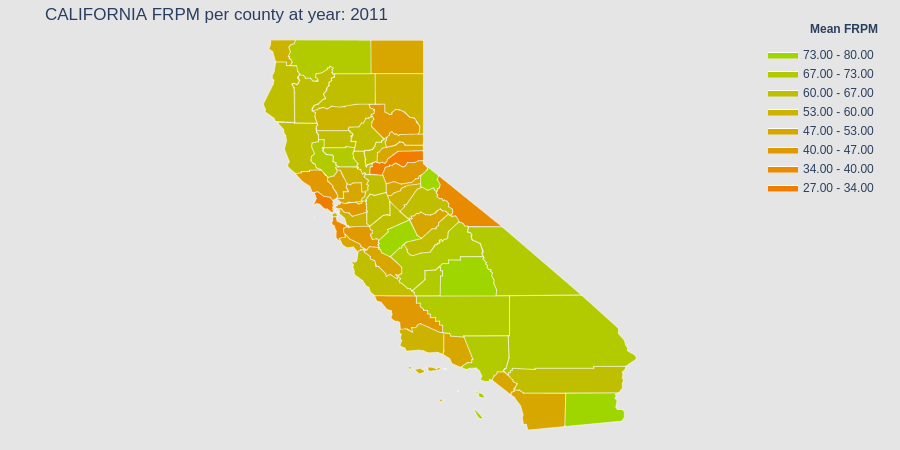

In [24]:
from IPython.display import Image 
Image('./frmp_images/animation.gif', format='png')

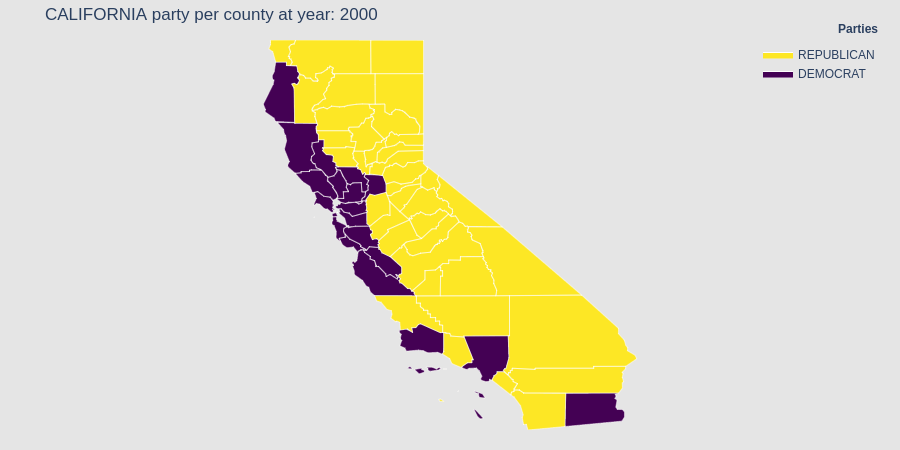

In [25]:
from IPython.display import Image 
Image('./images/animation.gif', format='png')

In [26]:
def get_presidential_data(yearly_data_frpm, period, fips_dict):
  data_dict = {}
  for year in period:
    if year in yearly_data_frpm:
      fips_counties = counties_to_fips_list(yearly_data_frpm[year]['county'], fips_dict)
      frpm_values = yearly_data_frpm[year]['mean_frpm']
      for i in range(len(fips_counties)):
        fip = fips_counties[i]
        frpm = frpm_values[i]
        if fip not in data_dict:
          data_dict[fip] = []
        data_dict[fip].append(frpm)
  for key in data_dict.keys():
    data_dict[key] = np.array(data_dict[key]).mean()
  return data_dict

In [27]:
import matplotlib.pyplot as plt

def calculate_corr(yearly_data, yearly_data_frpm, fips_dict):
  for year in yearly_data.keys():
    presidential_period = [year, year + 1, year + 2, year + 3]
    frpm_presidential = get_presidential_data(yearly_data_frpm, presidential_period, fips_dict)
    if not frpm_presidential:
      continue
    fips = []
    parties = []
    for fip, party, votes in yearly_data[year]:
      fips.append(fip)
      parties.append(party)
    df1 = pd.DataFrame({'fip': fips, 'party': parties})
    keys, values = zip(*frpm_presidential.items())
    df2 = pd.DataFrame({'fip': list(keys), 'frpm': list(values)})
    new_df = pd.concat([df1.set_index('fip'),df2.set_index('fip')], axis=1, join='inner').reset_index()
    democrat_mean = new_df[new_df['party'] == 'DEMOCRAT']['frpm'].mean()
    republican_mean = new_df[new_df['party'] == 'REPUBLICAN']['frpm'].mean()
    fig, ax = plt.subplots()
    ax.bar(['Democrat', 'Republican'], [democrat_mean, republican_mean], width=0.4)
    ax.set_title(f'Mean FRPM for each party in presidential period of: {year} - {year + 4}')
    fig.show()

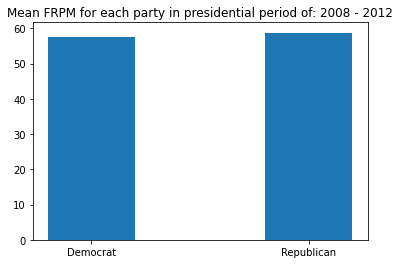

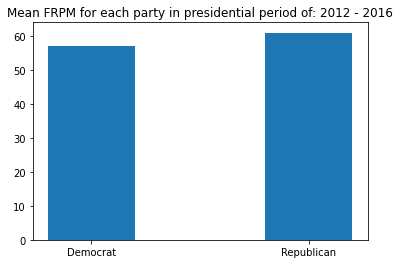

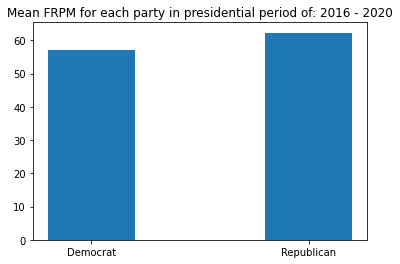

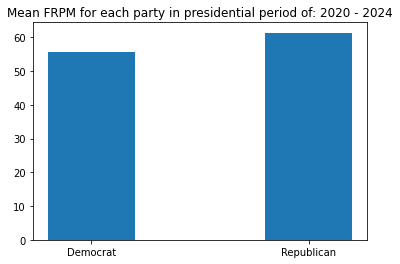

In [28]:
calculate_corr(yearly_data, yearly_data_frpm, fips_dict)

In [29]:
!wget -O police_dataset.csv https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD

--2021-08-22 08:06:32--  https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD
Resolving data.sfgov.org (data.sfgov.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.sfgov.org (data.sfgov.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police_dataset.csv’

police_dataset.csv      [        <=>         ] 171.47M  4.76MB/s    in 35s     

2021-08-22 08:07:09 (4.89 MB/s) - ‘police_dataset.csv’ saved [179797646]



In [30]:
!wget -O police_dataset_old.csv https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD

--2021-08-22 08:07:09--  https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD
Resolving data.sfgov.org (data.sfgov.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.sfgov.org (data.sfgov.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police_dataset_old.csv’

police_dataset_old.     [              <=>   ] 525.42M  4.01MB/s    in 2m 15s  

2021-08-22 08:09:25 (3.88 MB/s) - ‘police_dataset_old.csv’ saved [550945238]



In [31]:
!wget -O evictions.csv https://data.sfgov.org/api/views/5cei-gny5/rows.csv?accessType=DOWNLOAD

--2021-08-22 08:09:25--  https://data.sfgov.org/api/views/5cei-gny5/rows.csv?accessType=DOWNLOAD
Resolving data.sfgov.org (data.sfgov.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.sfgov.org (data.sfgov.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘evictions.csv’

evictions.csv           [             <=>    ]  12.37M  3.77MB/s    in 3.3s    

2021-08-22 08:09:30 (3.77 MB/s) - ‘evictions.csv’ saved [12970426]



In [32]:
import pandas as pd

police_df = pd.read_csv("/content/police_dataset.csv")
evictions_df = pd.read_csv("/content/evictions.csv")
police_df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,VI,Vehicle Initial,NaN,7023,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,LINDEN ST \ BUCHANAN ST,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,II,Initial,NaN,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,IS,Initial Supplement,NaN,62071,Warrant,Other,Probation Search,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,II,Initial,NaN,30140,Other Offenses,Other,"Air Gun, Possession",Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,30035000.0,Central,North Beach,3.0,37.802755,-122.413623,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [33]:
def get_vector_reasons(row, reasons):
  tmp = []
  for reason in reasons:
    if row[reason]:
      tmp.append(reason)
  return tmp[0] if len(tmp) > 0 else ""

def get_cleaned_eviction_data(df):
  eviction_reasons = ['Non Payment', 'Breach', 'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial'
                    ,'Unapproved Subtenant', 'Owner Move In', 'Demolition', 'Capital Improvement', 'Substantial Rehab'
                    ,'Ellis Act WithDrawal', 'Condo Conversion', 'Roommate Same Unit', 'Other Cause', 'Late Payments'
                    ,'Lead Remediation', 'Development', 'Good Samaritan Ends']

  relevant_evictions_df = df[evictions_df['File Date'].apply(lambda x: int(x[-4:]) > 2018).values]
  relevant_evictions_df['eviction_reason'] = relevant_evictions_df.apply(lambda row: get_vector_reasons(row, eviction_reasons), axis = 1)
  relevant_evictions_df = relevant_evictions_df.drop(eviction_reasons, axis=1)
  relevant_evictions_df = relevant_evictions_df.dropna(subset=['Location', 'Shape'])
  relevant_evictions_df = relevant_evictions_df[['File Date', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Location', 'Shape', 'eviction_reason']]
  return relevant_evictions_df

In [34]:
cleaned_evictions_df = get_cleaned_eviction_data(evictions_df)
cleaned_evictions_df

,File Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location,Shape,eviction_reason
97,04/25/2019,9.0,Mission,"(37.769071588573304, -122.42085763063936)",POINT (-122.42086 37.769073),Breach
99,09/30/2020,9.0,Mission,"(37.768164898677306, -122.4217818487889)",POINT (-122.42178 37.768166),Unapproved Subtenant
103,05/11/2020,4.0,Sunset/Parkside,"(37.76221395816787, -122.50766438484537)",POINT (-122.50767 37.762215),Nuisance
104,06/03/2021,8.0,Mission,"(37.76090110222961, -122.42150180589154)",POINT (-122.4215 37.760902),Nuisance
116,04/22/2019,9.0,Bernal Heights,"(37.74593096143219, -122.41425316814505)",POINT (-122.41425 37.74593),Owner Move In
...,...,...,...,...,...,...
17549,01/02/2019,11.0,Excelsior,"(37.714794268171254, -122.43576108607438)",POINT (-122.43576 37.714794),Unapproved Subtenant
17552,02/28/2020,7.0,Lakeshore,"(37.71746528654667, -122.48062777506037)",POINT (-122.48063 37.717464),Breach
17554,10/15/2019,7.0,Lakeshore,"(37.71671261672329, -122.47761144671514)",POINT (-122.47761 37.716713),Breach
17555,06/27/2019,7.0,Lakeshore,"(37.7201216986585, -122.48303711665423)",POINT (-122.48304 37.720123),Nuisance


### Day of week distribution
As seen below even when most of the days are somewhat balanced Sunday which is a rest day at US has less incidents reported. This might be because less businesses are open or more people decided to stay at home and rest.
### Top 10 most common incidents reported
There are over 40 incidents types but most of them are unique labeled type such as "Human Trafficking (B)" or just uncommon, we plot the top 10 to see how they distributed. We found that the majority of incidents are Assaults and Burglary, we might be able to create and train a model to classifiy an incident based on day of week and location.

### Classification Model
As a process of learning the data we thought about making a model that classify the incident category by a vector of features, this however did not work as well and the model stuck to the majority rule and classify most examples the same.<br>
Models used: LogisticRegression,xgboost and gussianNB.<br>
The features where based on the time, location and day of the weak along with some extra features about the neighborhood and suprivised district, the idea behind it was that the model will judge based on the area and time what might have happened. <br> Some cases do share a similar features values like human trafficing for example won't be present in mid day on a popular place, but further investigation might be needed to create a more sophisticated and complex model.

In [44]:
features = ['Incident Time', 'Incident Day of Week', 'Supervisor District','Latitude', 'Longitude','Neighborhoods','Incident Category']
featured_police_df = police_df[features]
categorical_features = ['Incident Day of Week', 'Incident Category']
featured_police_df = featured_police_df.dropna()
for category in categorical_features:
  featured_police_df[category] = featured_police_df[category].astype("category").cat.codes
featured_police_df['Incident Time'] = featured_police_df['Incident Time'].apply(lambda time: int(time.split(':')[0]) * 60 + int(time.split(':')[1])).astype(int)
featured_police_df

,Incident Time,Incident Day of Week,Supervisor District,Latitude,Longitude,Neighborhoods,Incident Category
0,1260,5,6.0,37.779992,-122.413487,21.0,18
1,720,2,5.0,37.775787,-122.427819,22.0,24
2,1050,0,9.0,37.723944,-122.422830,90.0,18
3,910,2,6.0,37.775161,-122.403636,32.0,45
4,36,6,3.0,37.802755,-122.413623,106.0,30
...,...,...,...,...,...,...,...
493308,1200,0,6.0,37.785893,-122.412148,20.0,34
493309,1054,2,1.0,37.780476,-122.476169,5.0,18
493310,115,1,10.0,37.754000,-122.389860,56.0,2
493311,1020,2,5.0,37.777490,-122.433219,23.0,18


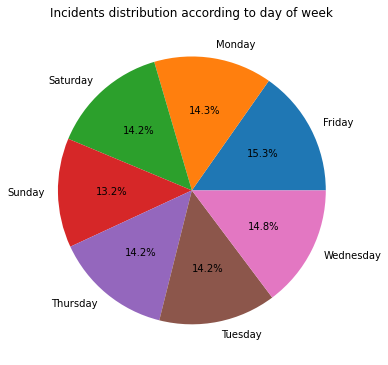

In [42]:
fig, ax = plt.subplots(figsize=(6, 8))
labels = police_df.groupby(['Incident Day of Week']).size().to_dict()
ax.set_title('Incidents distribution according to day of week')
markers = ax.pie(labels.values(), labels=labels.keys(),autopct='%1.1f%%')
# plt.legend(markers[0], ['Continued', 'Disengaged'], loc="best")
plt.show()

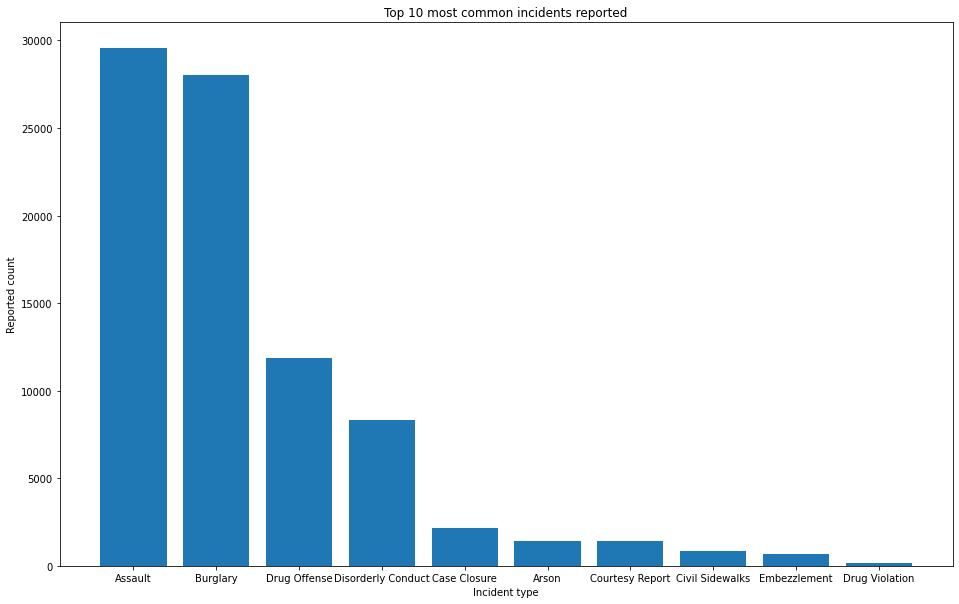

In [43]:
fig, ax = plt.subplots(figsize=(16, 10))

top10_incidents_types = police_df.groupby(['Incident Category']).size()[:10].sort_values(ascending=False).to_dict()
ax.set_title('Top 10 most common incidents reported')
ax.set_xlabel('Incident type')
ax.set_ylabel('Reported count')
ax.bar(top10_incidents_types.keys(), top10_incidents_types.values())
# plt.legend(markers[0], ['Continued', 'Disengaged'], loc="best")
plt.show()

In [45]:
import xgboost as xgb
X_train, y_train = featured_police_df.drop(['Incident Category'], axis=1) , featured_police_df['Incident Category']
model = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=1000,                                                                    
    subsample=0.8,
    random_state=34
)

model.fit(X_train, y_train)

[08:09:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=34,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [52]:
model.score(X_train, y_train)

0.02368007866240407

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

X_train, y_train = featured_police_df.drop(['Incident Category'], axis=1) , featured_police_df['Incident Category']
clf = LogisticRegression(random_state=0, multi_class='multinomial').fit(X_train, y_train)
print(f'LogisticRegression score: {clf.score(X_train, y_train)}')


clf = GaussianNB().fit(X_train, y_train)
print(f'GaussianNB score: {clf.score(X_train, y_train)}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression score: 0.2897112938893599
GaussianNB score: 0.28315356577831774


# Does evictions has something to do with police incidents?
Another idea that came to our head is wheter a location is more prone to evictions then others, in other words "Are there areas where people get evicted more often?".<br>
To check this assumption we counted each disrict incidents and evictions and calculated the correlation between them using spearman-correlation.
#Results
The results were clear and showed a Positive correlation of 0.783 between the two features, meaning that with the rise of incidents exists a rise in evictions.<br>
It is not a big surprise and was even expected, evictions is common in places where crime levels are higher and those neighborhoods usually have a low socioeconomic status.

### San Francisco street center-lines
As presented in the map below we see the density of incidents in each area, most areas on the map are somewhat equal except a few points along the edges. But the area with the most density of incidents is what considered DownTown, this correlates well with the results we got earlier as downtown is busy place with a lot of crime incidents.

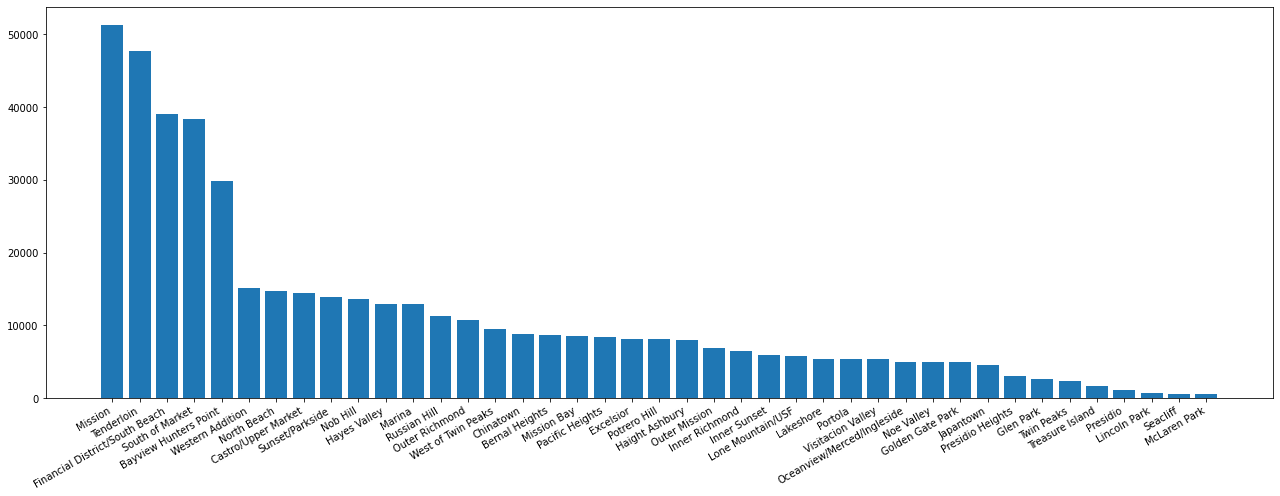

In [36]:
import matplotlib.pyplot as plt

neihborhood_police_calls = police_df['Analysis Neighborhood'].value_counts().to_dict()
fig, ax = plt.subplots(figsize=(22, 8))
ax.bar(neihborhood_police_calls.keys(), neihborhood_police_calls.values())
plt.gcf().autofmt_xdate()

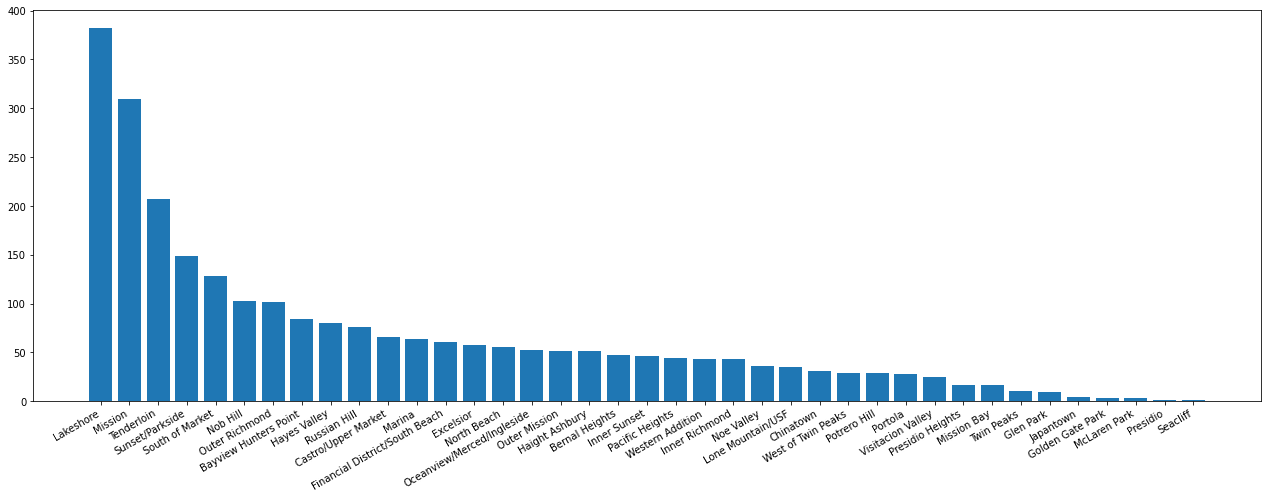

In [37]:
evictions_dict = cleaned_evictions_df.groupby(['Neighborhoods - Analysis Boundaries'])['Neighborhoods - Analysis Boundaries'].count().sort_values(ascending=False).to_dict()
fig, ax = plt.subplots(figsize=(22, 8))
ax.bar(evictions_dict.keys(), evictions_dict.values())
plt.gcf().autofmt_xdate()

In [38]:
import numpy as np

combined_df = pd.DataFrame.from_dict(neihborhood_police_calls, columns=['police call'],orient='index')
combined_df["evictions"] = np.nan
for key in evictions_dict.keys():
  if key in combined_df.index:
    combined_df.at[key, 'evictions'] = evictions_dict[key]
combined_df = combined_df.dropna()
combined_df

,police call,evictions
Mission,51213,310.0
Tenderloin,47734,207.0
Financial District/South Beach,39064,61.0
South of Market,38313,128.0
Bayview Hunters Point,29862,84.0
Western Addition,15091,43.0
North Beach,14747,56.0
Castro/Upper Market,14412,66.0
Sunset/Parkside,13903,149.0
Nob Hill,13571,103.0


In [39]:
from scipy import stats
from sklearn import preprocessing

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]
  
def analyze_correlation(df):
  correlation_value = round(stats.spearmanr(df['police call'], df['evictions']).correlation, 4)
  p_value = stats.spearmanr(df['police call'], df['evictions']).pvalue
  df = pd.DataFrame({'date': df.index, 'police call': df['police call'].values, 'evictions': df['evictions'].values})
  ax = df.plot(x="police call", y="evictions", style=['go','ro'], figsize=(10, 5),
          title=f'Correlation of evictions and police calls is {correlation_value} with p-value of {p_value}', loglog=True)
  ax.set_xlabel("police call")
  ax.set_ylabel("evictions")

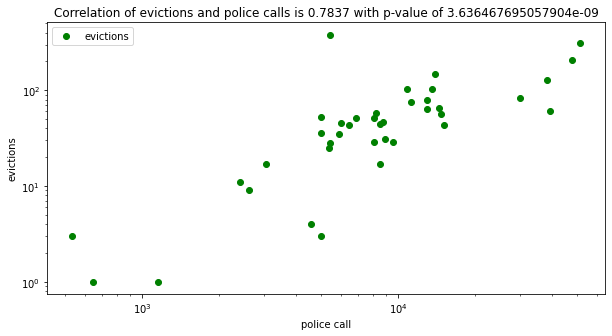

In [40]:
analyze_correlation(combined_df)

In [41]:
police_df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,VI,Vehicle Initial,NaN,7023,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,LINDEN ST \ BUCHANAN ST,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,II,Initial,NaN,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,IS,Initial Supplement,NaN,62071,Warrant,Other,Probation Search,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,II,Initial,NaN,30140,Other Offenses,Other,"Air Gun, Possession",Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,30035000.0,Central,North Beach,3.0,37.802755,-122.413623,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493308,2021/01/15 08:00:00 PM,2021/01/15,20:00,2021,Friday,2021/01/18 11:03:00 PM,99729103074,997291,210041000,210183477.0,II,Initial,NaN,3074,Robbery,Robbery - Other,"Robbery, W/ Force",Cite or Arrest Adult,OFARRELL ST \ SHANNON ST,24944000.0,Tenderloin,Tenderloin,6.0,37.785893,-122.412148,POINT (-122.41214750780264 37.78589292711297),20.0,NaN,1.0,NaN,NaN,NaN,10.0,5.0
493309,2020/08/01 05:34:00 PM,2020/08/01,17:34,2020,Saturday,2020/08/01 06:04:00 PM,94911806361,949118,200461010,202142200.0,II,Initial,NaN,6361,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, <$50",Open or Active,GEARY BLVD \ 17TH AVE,27500000.0,Richmond,Outer Richmond,1.0,37.780476,-122.476169,POINT (-122.47616919036905 37.780475849410344),5.0,NaN,NaN,NaN,NaN,NaN,4.0,8.0
493310,2020/06/01 01:55:00 AM,2020/06/01,01:55,2020,Monday,2020/06/01 01:55:00 AM,93192005061,931920,200330863,201530294.0,II,Initial,NaN,5061,Burglary,Burglary - Commercial,"Burglary, Warehouse, Forcible Entry",Open or Active,24TH ST \ MINNESOTA ST,23610000.0,Bayview,Potrero Hill,10.0,37.754000,-122.389860,POINT (-122.38985954971992 37.75399971361786),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
493311,2020/10/24 05:00:00 PM,2020/10/24,17:00,2020,Saturday,2020/10/24 06:34:00 PM,97231606244,972316,200642975,202982445.0,II,Initial,NaN,6244,Larceny T

In [48]:
from shapely.geometry import Point ,polygon
import geopandas as gpd

In [49]:
geometry = police_df['Longitude'].to_frame().join(police_df['Latitude'])
geometry['Counts'] = np.zeros(len(geometry))
geometry = geometry.groupby(['Longitude', 'Latitude']).count()
geometry = geometry.reset_index()
geometry

,Longitude,Latitude,Counts
0,-122.511295,37.775076,1204
1,-122.510341,37.764001,16
2,-122.510169,37.775128,79
3,-122.510037,37.773259,57
4,-122.509895,37.771396,860
...,...,...,...
6442,-122.369541,37.729474,8
6443,-122.369133,37.729183,3
6444,-122.369037,37.730017,39
6445,-122.368430,37.727845,42


In [50]:
sf_map = gpd.read_file(base_folder + 'shp_files/city-of-san-francisco-california-streets.shp')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Text(0.5, 1.0, 'San Francisco street center-lines based on police calls')

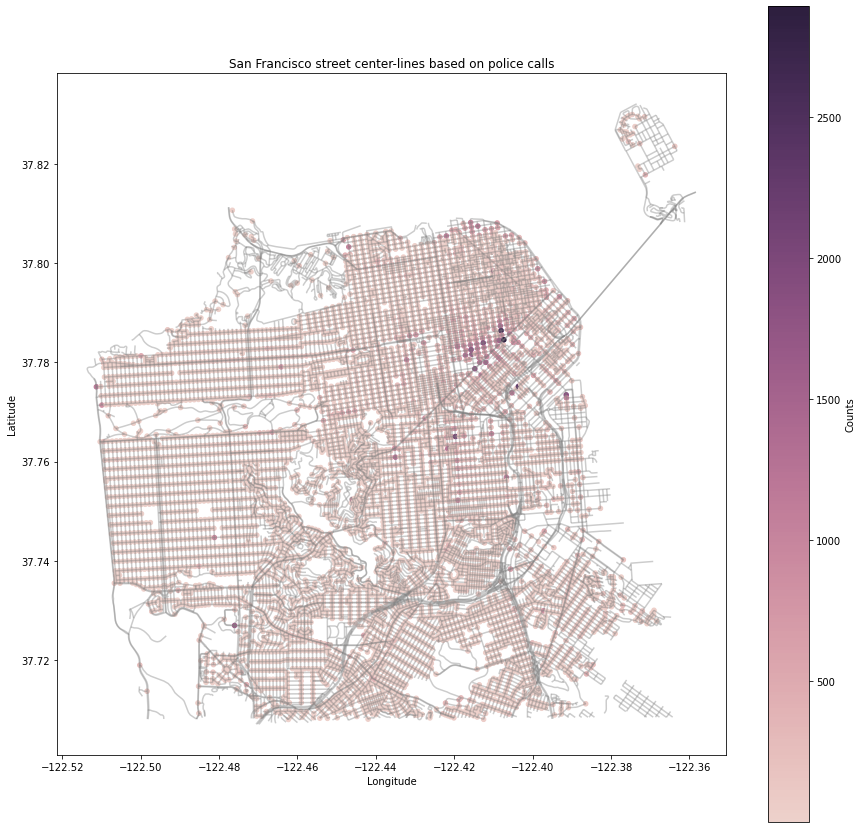

In [51]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 15))
crs = {'init':'EPSG:4326'}

cmap = sns.cubehelix_palette(as_cmap=True)

sf_map = sf_map.to_crs(crs)
sf_map.plot(ax= ax,alpha = 0.4, color='grey')
geometry.plot.scatter(x='Longitude', y='Latitude', c='Counts', ax=ax, cmap=cmap)
ax.set_title('San Francisco street center-lines based on police calls')